For this challenge, you will need to choose a corpus of data from nltk or another source that includes categories you can predict and create an analysis pipeline that includes the following steps:

    Data cleaning / processing / language parsing  --==DONE==--
    Create features using two different NLP methods: For example, BoW vs tf-idf.  --==DONE==--
    Use the features to fit supervised learning models for each feature set to predict the category outcomes.
    Assess your models using cross-validation and determine whether one model performed better.
    Pick one of the models and try to increase accuracy by at least 5 percentage points.

Write up your report in a Jupyter notebook. Be sure to explicitly justify the choices you make throughout, and submit it below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
import pandas as pd
import re
from spacy.tokens import Doc
%matplotlib inline

In [2]:
df = pd.read_csv("Trump_Data.csv")

In [3]:
df.shape

(11759, 11)

In [4]:
df.columns

Index(['text', 'retweet_count', 'favorite_count', 'Followers',
       'Follower_Change', 'Num_Tweets', 'Year', 'Month', 'Week', 'Day',
       'Hour'],
      dtype='object')

In [5]:
df.describe()

,retweet_count,favorite_count,Followers,Follower_Change,Num_Tweets,Year,Month,Week,Day,Hour
count,11759.000000,11759.000000,1.175900e+04,11759.000000,11759.000000,11759.000000,11759.000000,11759.000000,11759.000000,11759.000000
mean,10542.179012,40495.229101,2.002753e+07,33538.335913,16.072625,2016.246875,7.017604,28.794200,16.127307,12.692746
std,12463.598542,45900.885681,1.858377e+07,34112.172794,14.580381,1.066680,3.237644,14.067874,8.823738,7.071398
min,6.000000,34.000000,2.957264e+06,-329029.000000,-29.000000,2015.000000,1.000000,1.000000,1.000000,0.000000
25%,1516.000000,3727.000000,5.033780e+06,12714.000000,7.000000,2015.000000,5.000000,18.000000,8.000000,9.000000
50%,6806.000000,19503.000000,9.941948e+06,22188.000000,13.000000,2016.000000,7.000000,30.000000,17.000000,13.000000
75%,16433.000000,70692.000000,3.780345e+07,44629.000000,20.000000,2017.000000,10.000000,41.000000,24.000000,19.000000
max,369530.000000,633253.000000,5.467247e+07,801107.000000,98.000000,2018.000000,12.000000,53.000000,31.000000,23.000000


In [6]:
#Creating a feature for the ranking of each tweet in terms of retweets from users
df['RPR']=round(df['retweet_count'].rank(pct=True), 2)


In [7]:
#Creating a feature for the ranking of each tweet in terms of favoriting from users
df['FavRank']=round(df['favorite_count'].rank(pct=True), 2)

In [8]:
df.head()

,text,retweet_count,favorite_count,Followers,Follower_Change,Num_Tweets,Year,Month,Week,Day,Hour,RPR,FavRank
0,Judge Kavanaugh showed America exactly why I n...,85502,320158,54672474,21128,12,2018,9,39,27,22,1.00,1.00
1,https://t.co/9o5gZlJiTd,17391,77145,54651346,20751,13,2018,9,39,26,23,0.77,0.79
2,Join me this Saturday in Wheeling West Virgini...,14484,52957,54651346,20751,13,2018,9,39,26,20,0.70,0.66
3,Congressman Lee Zeldin is doing a fantastic jo...,14949,65494,54651346,20751,13,2018,9,39,26,17,0.71,0.72
4,China is actually placing propaganda ads in th...,19236,58671,54651346,20751,13,2018,9,39,26,17,0.81,0.69


In [9]:
df.isnull().sum()

text               0
retweet_count      0
favorite_count     0
Followers          0
Follower_Change    0
Num_Tweets         0
Year               0
Month              0
Week               0
Day                0
Hour               0
RPR                0
FavRank            0
dtype: int64

In [10]:
df.dtypes

text                object
retweet_count        int64
favorite_count       int64
Followers            int64
Follower_Change      int64
Num_Tweets           int64
Year                 int64
Month                int64
Week                 int64
Day                  int64
Hour                 int64
RPR                float64
FavRank            float64
dtype: object

In [11]:
df.corr()

,retweet_count,favorite_count,Followers,Follower_Change,Num_Tweets,Year,Month,Week,Day,Hour,RPR,FavRank
retweet_count,1.000000,0.925647,0.620991,0.408060,-0.305235,0.631540,-0.076898,-0.078269,-0.011988,0.023207,0.801766,0.783624
favorite_count,0.925647,1.000000,0.762843,0.498582,-0.369138,0.763447,-0.128495,-0.129896,-0.007737,0.026217,0.866016,0.886201
Followers,0.620991,0.762843,1.000000,0.299889,-0.348396,0.943352,-0.072561,-0.072363,0.018072,0.059979,0.779963,0.816845
Follower_Change,0.408060,0.498582,0.299889,1.000000,-0.089657,0.344190,-0.090484,-0.093085,-0.021009,-0.025708,0.477768,0.510824
Num_Tweets,-0.305235,-0.369138,-0.348396,-0.089657,1.000000,-0.404724,0.195356,0.194418,0.024690,-0.231143,-0.414188,-0.438844
Year,0.631540,0.763447,0.943352,0.344190,-0.404724,1.000000,-0.332239,-0.332315,0.005218,0.070346,0.835034,0.874685
Month,-0.076898,-0.128495,-0.072561,-0.090484,0.195356,-0.332239,1.000000,0.995835,-0.041016,-0.045322,-0.134290,-0.171170
Week,-0.078269,-0.129896,-0.072363,-0.093085,0.194418,-0.332315,0.995835,1.000000,0.047822,-0.044539,-0.133660,-0.170706
Day,-0.011988,-0.007737,0.018072,-0.021009,0.024690,0.005218,-0.041016,0.047822,1.000000,-0.003603,0.006744,0.006495
Hour,0.023207,0.026217,0.059979,-0.025708,-0.231143,0.070346,-0.045322,-0.044539,-0.003603,1.000000,0.055461,0.052380


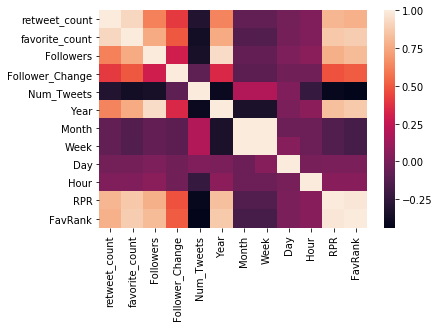

In [12]:
sns.heatmap(df.corr())

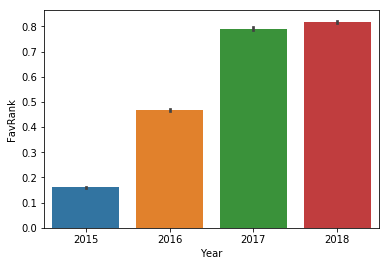

In [13]:
#Each year's rankings of favorited tweets when compared to other tweets in the account
#(Higher the bar is the greater number of favorited tweets)
sns.barplot(x=df.Year, y=df.FavRank)

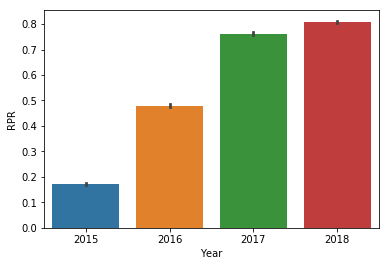

In [14]:
#Popularity of each year's tweets as displayed by the quantity of retweets by users
#(Higher the bar is the greater number of retweeted tweets)
sns.barplot(x=df.Year, y=df.RPR)

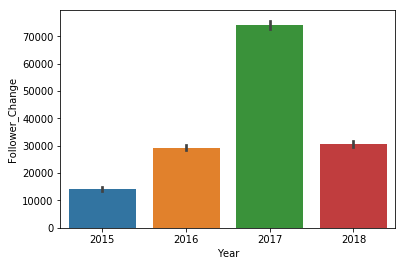

In [15]:
#Each year's creation of new followers
#(Higher the bar means the greater the number of accounts beginning to follow this account)
sns.barplot(x=df.Year, y=df.Follower_Change)

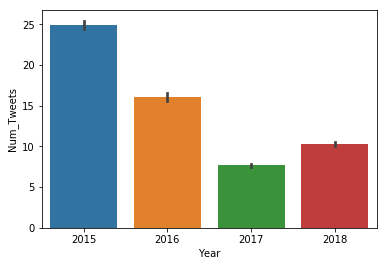

In [16]:
#Average quantity of tweets in a day across years
#(Higer the bar, the greater the number of tweets)
sns.barplot(x=df.Year, y=df.Num_Tweets)

=========================================================================================================NLP

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import nltk

In [117]:
nlp = spacy.load("en_core_web_sm")

In [127]:
text = df['text']

In [119]:
#vectorizer = TfidfVectorizer(input=(text), strip_accents = 'unicode', lowercase = True,
#                      stop_words=('english'), analyzer=('word'), token_pattern='string')

In [134]:
text = text.apply(nlp)

In [135]:
text

0        (Judge, Kavanaugh, showed, America, exactly, w...
1                                (https://t.co/9o5gZlJiTd)
2        (Join, me, this, Saturday, in, Wheeling, West,...
3        (Congressman, Lee, Zeldin, is, doing, a, fanta...
4        (China, is, actually, placing, propaganda, ads...
5        (Avenatti, is, a, third, rate, lawyer, who, is...
6        (Jobless, Claims, fell, to, their, lowest, lev...
7        (Consumer, confidence, hits, an, 18, year, hig...
8        (The, Democrats, are, playing, a, high, level,...
9        (ÒThese, law, enforcement, people, took, the, ...
10       (73rd, Session, of, the, United, Nations, Gene...
11       (ÒConsumer, confidence, rose, in, September, n...
12       (ÒRemarks, by, President, Trump, at, a, Lunche...
13       (ÒRemarks, by, President, Trump, to, the, 73rd...
14       (Rush, Limbaugh, to, Republicans, :, ÒYou, can...
15       (Thank, you, Dr., Jeffress, !, https://t.co/cm...
16          (Thank, you, Mark, !, https://t.co/NVGs6WbQe

In [137]:

df2 = df

tokens = []
lemma = []
pos = []

for doc in nlp.pipe(text.astype('unicode').values, batch_size=9844,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df2['s_tokens_AsmtP'] = tokens
df2['s_lemmas_AsmtP'] = lemma
df2['s_pos_AsmtP'] = pos

In [138]:
df2.head()

,text,retweet_count,favorite_count,Followers,Follower_Change,Num_Tweets,Year,Month,Week,Day,Hour,RPR,FavRank,s_tokens_AsmtP,s_lemmas_AsmtP,s_pos_AsmtP
0,Judge Kavanaugh showed America exactly why I n...,85502,320158,54672474,21128,12,2018,9,39,27,22,1.00,1.00,"[Judge, Kavanaugh, showed, America, exactly, w...","[Judge, Kavanaugh, show, America, exactly, why...","[PROPN, PROPN, VERB, PROPN, ADV, ADV, PRON, VE..."
1,https://t.co/9o5gZlJiTd,17391,77145,54651346,20751,13,2018,9,39,26,23,0.77,0.79,[https://t.co/9o5gZlJiTd],[https://t.co/9o5gZlJiTd],[PROPN]
2,Join me this Saturday in Wheeling West Virgini...,14484,52957,54651346,20751,13,2018,9,39,26,20,0.70,0.66,"[Join, me, this, Saturday, in, Wheeling, West,...","[join, -PRON-, this, Saturday, in, Wheeling, W...","[VERB, PRON, DET, PROPN, ADP, PROPN, PROPN, PR..."
3,Congressman Lee Zeldin is doing a fantastic jo...,14949,65494,54651346,20751,13,2018,9,39,26,17,0.71,0.72,"[Congressman, Lee, Zeldin, is, doing, a, fanta...","[Congressman, Lee, Zeldin, be, do, a, fantasti...","[PROPN, PROPN, PROPN, AUX, VERB, DET, ADJ, NOU..."
4,China is actually placing propaganda ads in th...,19236,58671,54651346,20751,13,2018,9,39,26,17,0.81,0.69,"[China, is, actually, placing, propaganda, ads...","[China, be, actually, place, propaganda, ad, i...","[PROPN, AUX, ADV, VERB, NOUN, NOUN, ADP, DET, ..."


In [143]:
texttoken = df2['s_tokens_AsmtP']

===========================================================================================  Tfidf Feature Creation

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#vectorizer = TfidfVectorizer(input=(text), strip_accents = 'unicode', lowercase = True,
#                     stop_words=('english'), analyzer=('word'), token_pattern='string')

In [182]:
X_train, X_test= train_test_split(texttoken, test_size=0.3, random_state=42)

In [187]:
vectorizer = TfidfVectorizer(input=(text),
                             strip_accents = 'unicode',
                             analyzer=('word'),
                             token_pattern='string', 
                             tokenizer='tokens',
                             sublinear_tf=False,
                             max_df=7, # drop words that occur in more than 70% the paragraphs
                             min_df=2, # only use words that appear at least twice
                             lowercase=True,
                             stop_words= {'english'},
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [157]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [186]:
print (X_train_tfidf)

  (0, 4716)	0.7401077133349974
  (0, 2929)	0.672488343885633
  (1, 3248)	0.4980854337078643
  (1, 2114)	0.4813863003079368
  (1, 2039)	0.521621540325871
  (1, 4693)	0.4980854337078643
  (2, 2358)	0.5833189234776963
  (2, 178)	0.5833189234776963
  (2, 2154)	0.5652239087526668
  (4, 3629)	0.5803997596706052
  (4, 1119)	0.5712024491794546
  (4, 2095)	0.5803997596706052
  (5, 3626)	1.0
  (7, 4662)	0.6042786263783042
  (7, 4619)	0.5855334250789088
  (7, 2009)	0.5403683464246511
  (9, 1805)	0.49900264916287324
  (9, 1772)	0.5149776639218155
  (9, 3280)	0.49900264916287324
  (9, 4011)	0.4866114650504019
  (10, 3440)	0.4835650529942869
  (10, 1300)	0.4393845055117048
  (10, 205)	0.4393845055117048
  (10, 3615)	0.4393845055117048
  (10, 2540)	0.43242179463035424
  :	:
  (8210, 2785)	0.4594155287006331
  (8210, 462)	0.43477483022385044
  (8210, 4417)	0.44985702696313146
  (8210, 1306)	0.44985702696313146
  (8213, 1556)	0.6958801270699249
  (8213, 1469)	0.7181579552919715
  (8216, 1606)	0.5985640

In [222]:
(X_train_tfidf.shape)

(8231, 4813)

In [208]:
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]
    #Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 
    #indicates that the word was present once in that sentence.
print('Original sentence:', texttoken[1])
print('Tf_idf vector:', tfidf_bypara)

Original sentence: ['https://t.co/9o5gZlJiTd']


Tf_idf vector: [{'ya': 0.7401077133349974, 'norfolk': 0.672488343885633}, {'powers': 0.4980854337078643, 'however': 0.4813863003079368, 'helsinki2018': 0.521621540325871, 'worldõs': 0.4980854337078643}, {'jordan': 0.5833189234776963, 'abdullah': 0.5833189234776963, 'ii': 0.5652239087526668}, {}, {'role': 0.5803997596706052, 'critical': 0.5712024491794546, 'honoring': 0.5803997596706052}, {'roger': 1.0}, {}, {'willis': 0.6042786263783042, 'wearing': 0.5855334250789088, 'hat': 0.5403683464246511}, {}, {'fundraisers': 0.49900264916287324, 'foundationõs': 0.5149776639218155, 'pressed': 0.49900264916287324, 'steer': 0.4866114650504019}, {'reclaim': 0.4835650529942869, 'destiny': 0.4393845055117048, 'achieve': 0.4393845055117048, 'roaring': 0.4393845055117048, 'lifetime': 0.43242179463035424}, {'zogby': 1.0}, {'ignoring': 1.0}, {'disenfranchised': 1.0}, {'defrauded': 0.7071067811865476, 'agreeing': 0.7071067811865476}, {'microphone': 0.5266752838031786, 'decide': 0.487310445167744, 'spin': 0

In [215]:
tfidf_bypara

AttributeError: module 'spacy' has no attribute 'sort'